# Prediction of stress levels among Remote Employees

# About the Dataset 
1. With 3,363 records collected from Remote employees worldwide, this dataset provides valuable insights into key areas  stress levels, access to mental health resources, and job satisfaction. It’s designed to help researchers, HR professionals, and businesses assess the growing influence of remote work on productivity and well-being.

### Columns 

- Employee_ID: Unique identifier for each employee.
- Age: Age of the employee. 
- Gender: Gender of the employee
- Job_Role: Current role of the employee.
- Industry: Industry they work
  
Stress_Level: Their self-reported level of stress.- 
Mental_Health_Condition: Any mental health condition reported (Anxiety, Depression, etc.)- .
Social_Isolation_Rating: A self-reported rating (1-5) on how isolated they fe
- Satisfaction_with_Remote_Work: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).
  el. in.employee.

## Research Question: 
Predicting stress levels among Remote Employees.

## Importing libraries in pandas

In [188]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

print(pd.__version__)

2.2.2


## Understanding the Structure and format of the Dataset

In [190]:
Remotee_Employees = pd.read_csv('remote_employeess.csv',index_col=0)
Remotee_Employees

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Is_Remote
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Remote_Employees
EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Remote_Employees
EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,Remote_Employees
EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,Burnout,No,Increase,5,Unsatisfied,1,Weekly,Average,South America,Remote_Employees
EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia,Remote_Employees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa,Remote_Employees
EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,Burnout,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia,Remote_Employees
EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania,Remote_Employees


In [148]:
Remotee_Employees.shape

(3363, 20)

*   Displaying the first and last five rows of the dataset to get a glimpse of the datavalues so as to understand columns and  quickly examine the structure of the dataset.

In [150]:
#checking the first five rows
Remotee_Employees.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Is_Remote
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Remote_Employees
EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Remote_Employees
EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,Remote_Employees
EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,Burnout,No,Increase,5,Unsatisfied,1,Weekly,Average,South America,Remote_Employees
EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia,Remote_Employees


In [152]:
#checking the last five rows
Remotee_Employees.tail()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Is_Remote
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa,Remote_Employees
EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,Burnout,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia,Remote_Employees
EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania,Remote_Employees
EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,Remote_Employees
EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,Burnout,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,Remote_Employees


In [156]:
Remotee_Employees.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3363 entries, EMP0001 to EMP4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                3363 non-null   int64 
 1   Gender                             3363 non-null   object
 2   Job_Role                           3363 non-null   object
 3   Industry                           3363 non-null   object
 4   Years_of_Experience                3363 non-null   int64 
 5   Work_Location                      3363 non-null   object
 6   Hours_Worked_Per_Week              3363 non-null   int64 
 7   Number_of_Virtual_Meetings         3363 non-null   int64 
 8   Work_Life_Balance_Rating           3363 non-null   int64 
 9   Stress_Level                       3363 non-null   object
 10  Mental_Health_Condition            3363 non-null   object
 11  Access_to_Mental_Health_Resources  3363 non-null   object
 12  Pr

In [162]:
# Summary statistics for numerical columns
Remotee_Employees.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000
mean,40.944990,17.853405,39.514422,7.462979,3.002379,2.984538,3.008623
std,11.292825,10.051129,11.896516,4.648378,1.420088,1.390800,1.402890
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,3.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,7.000000,3.000000,3.000000,3.000000
75%,51.000000,26.500000,50.000000,11.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [192]:
# identifying the numerical variables in the dataset
num_column = Remotee_Employees.select_dtypes(include=['int64']).columns.tolist()
num_column

['Age',
 'Years_of_Experience',
 'Hours_Worked_Per_Week',
 'Number_of_Virtual_Meetings',
 'Work_Life_Balance_Rating',
 'Social_Isolation_Rating',
 'Company_Support_for_Remote_Work']

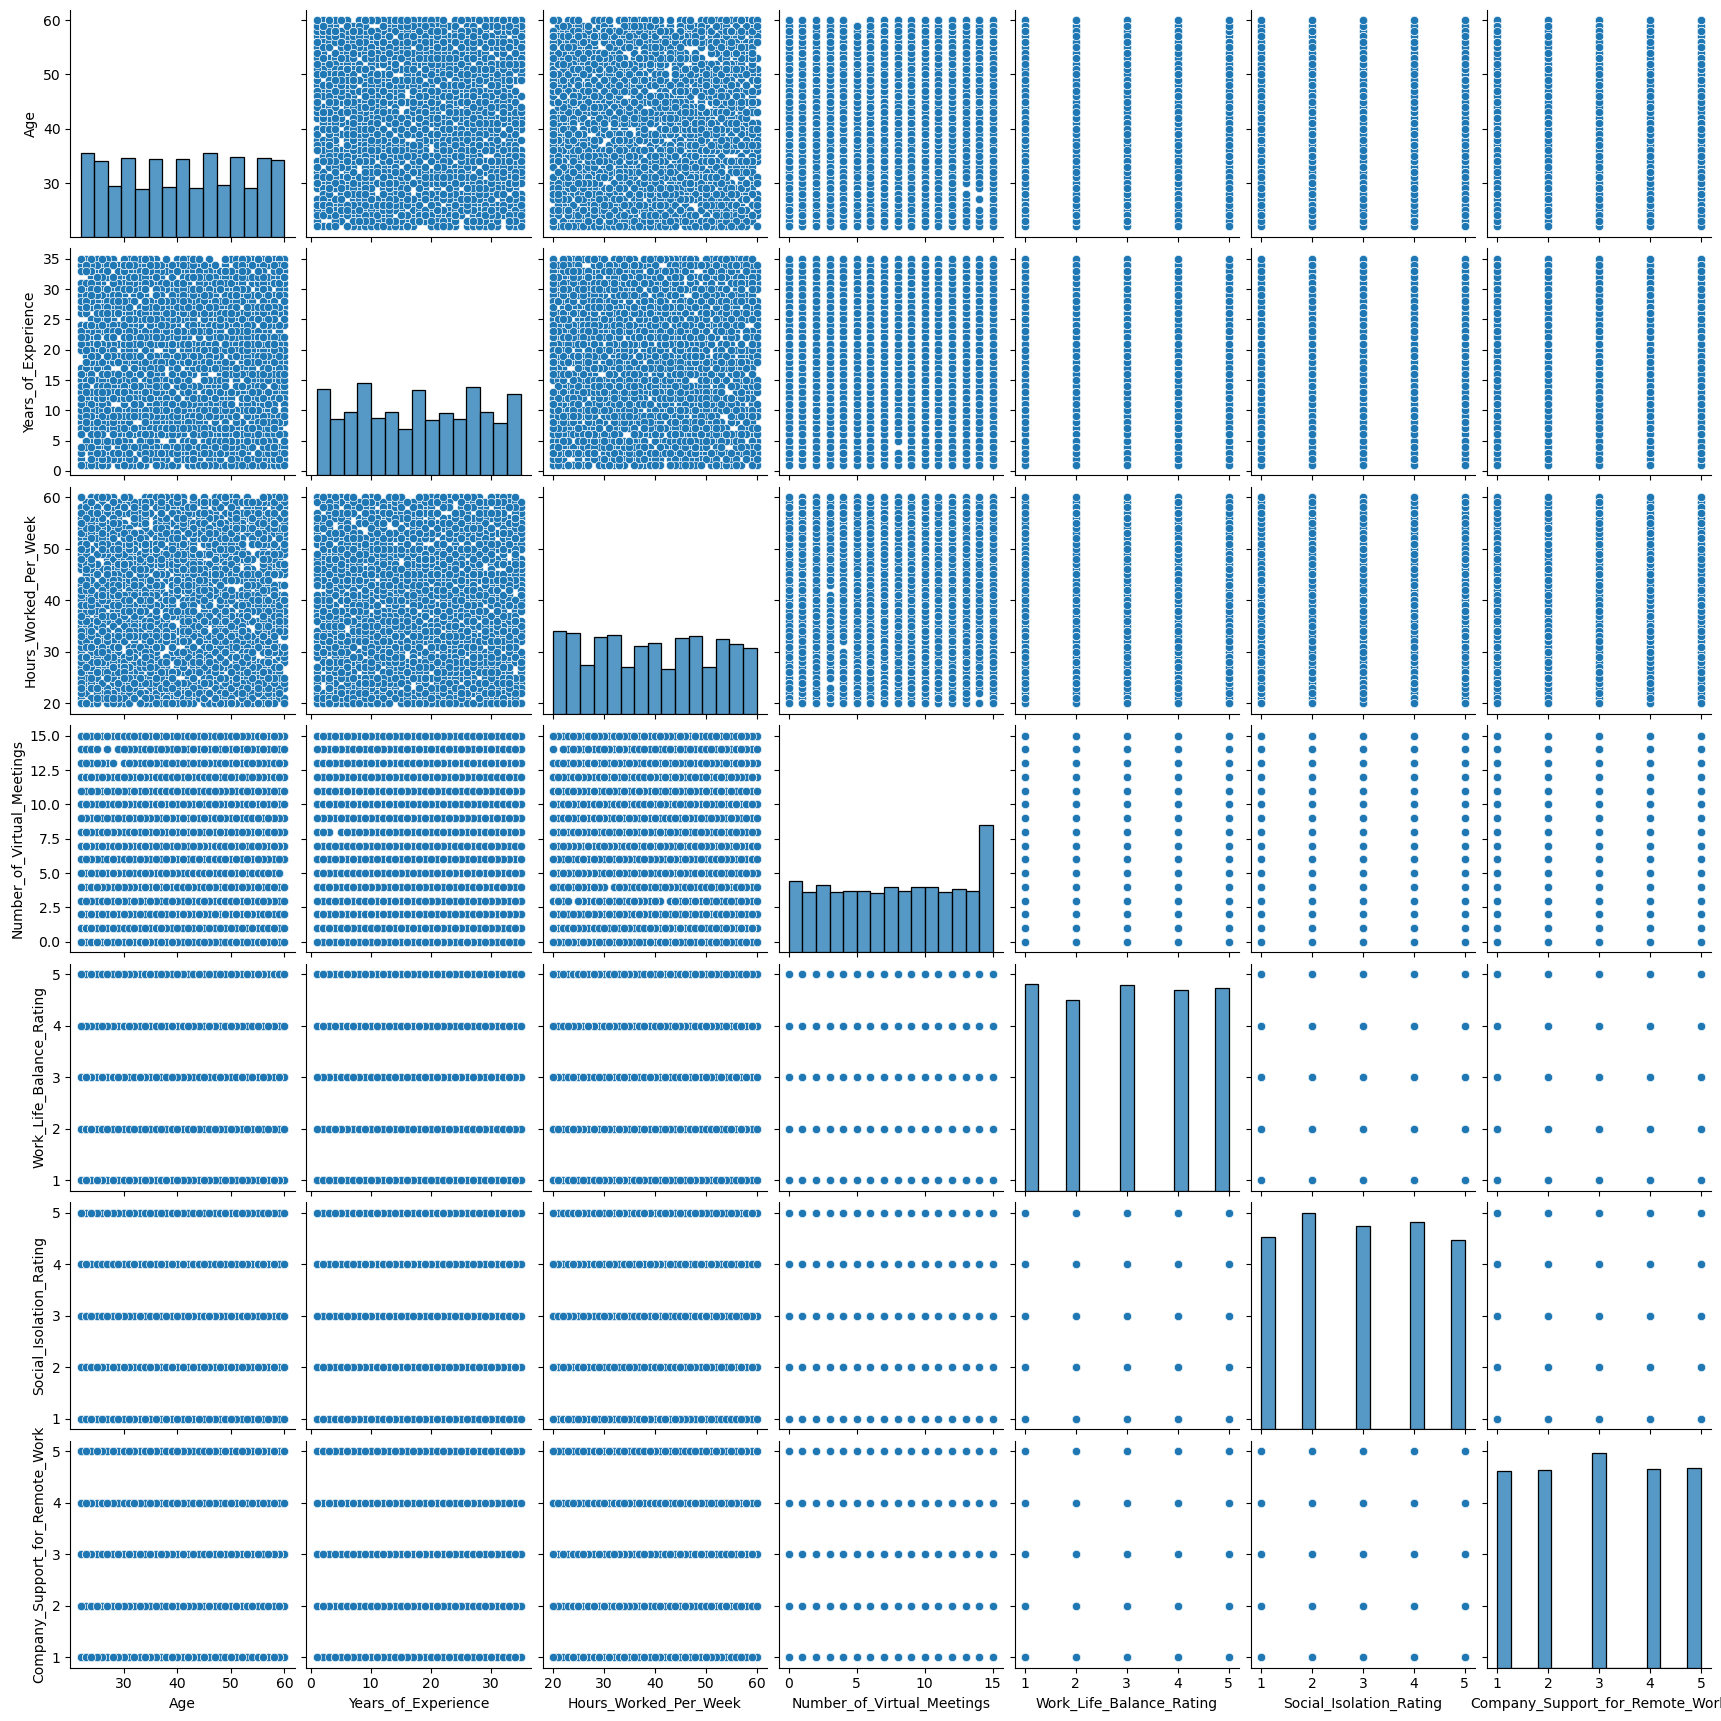

In [24]:
sns.pairplot(Remotee_Employees[num_column])

In [166]:
correlated = Remotee_Employees[num_column]. corr()
correlated

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
Age,1.000000,-0.005721,0.018051,0.001188,0.027125,-0.026492,0.019481
Years_of_Experience,-0.005721,1.000000,-0.003008,0.002230,-0.001934,-0.000056,0.004815
Hours_Worked_Per_Week,0.018051,-0.003008,1.000000,-0.000011,0.003554,-0.017137,-0.002993
Number_of_Virtual_Meetings,0.001188,0.002230,-0.000011,1.000000,0.016595,-0.001469,0.001121
Work_Life_Balance_Rating,0.027125,-0.001934,0.003554,0.016595,1.000000,-0.021366,-0.013746
Social_Isolation_Rating,-0.026492,-0.000056,-0.017137,-0.001469,-0.021366,1.000000,0.023392
Company_Support_for_Remote_Work,0.019481,0.004815,-0.002993,0.001121,-0.013746,0.023392,1.000000


<Axes: >

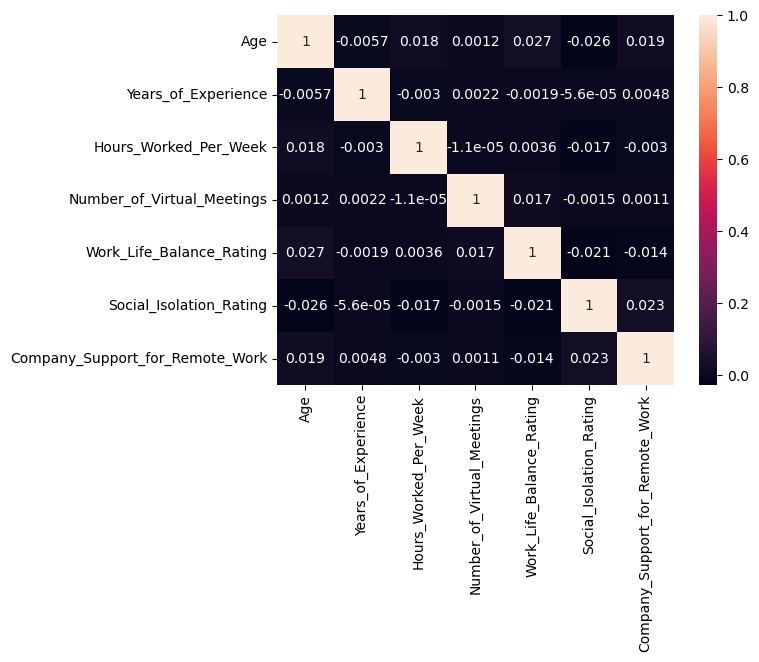

In [168]:
sns.heatmap(correlated, annot=True)

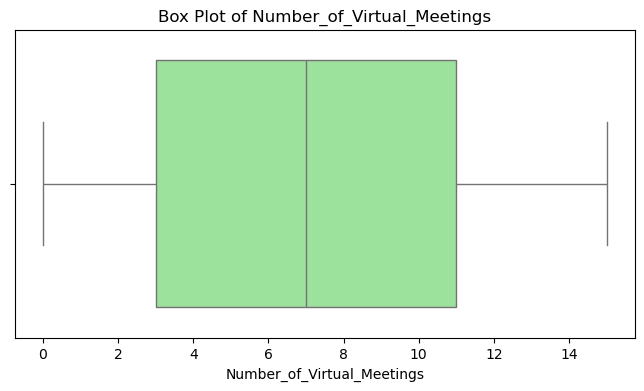

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=Remotee_Employees['Number_of_Virtual_Meetings'], color='lightgreen')
plt.title('Box Plot of Number_of_Virtual_Meetings')
plt.xlabel('Number_of_Virtual_Meetings')
plt.show()

# Data Cleaning

In [194]:
# Check for null values in the dataset and counting missing values for each of the columns using sum() method
null_values = Remotee_Employees.isnull().sum()
null_values


Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
Is_Remote                            0
dtype: int64

In [34]:
#checking missing values and found none
null_value = Remotee_Employees.isnull().sum()
null_value

Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
Is_Remote                            0
dtype: int64


**Found no duplicates in the dataset**

In [36]:
#checking for duplicates in the dataset
duplicates = Remotee_Employees[Remotee_Employees.duplicated()]
duplicates

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Is_Remote
Employee_ID,,,,,,,,,,,,,,,,,,,,


In [470]:
# machine learning
# Predicting stress levels among Remote Employees

In [38]:
Remotee_Employees

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Is_Remote
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Remote_Employees
EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Remote_Employees
EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,Remote_Employees
EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,Burnout,No,Increase,5,Unsatisfied,1,Weekly,Average,South America,Remote_Employees
EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia,Remote_Employees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa,Remote_Employees
EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,Burnout,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia,Remote_Employees
EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania,Remote_Employees


In [40]:
Remotee_Employees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3363 entries, EMP0001 to EMP4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                3363 non-null   int64 
 1   Gender                             3363 non-null   object
 2   Job_Role                           3363 non-null   object
 3   Industry                           3363 non-null   object
 4   Years_of_Experience                3363 non-null   int64 
 5   Work_Location                      3363 non-null   object
 6   Hours_Worked_Per_Week              3363 non-null   int64 
 7   Number_of_Virtual_Meetings         3363 non-null   int64 
 8   Work_Life_Balance_Rating           3363 non-null   int64 
 9   Stress_Level                       3363 non-null   object
 10  Mental_Health_Condition            3363 non-null   object
 11  Access_to_Mental_Health_Resources  3363 non-null   object
 12  Pr

In [196]:
Remotee_Employees = Remotee_Employees.drop(columns=["Is_Remote", "Work_Location"])

In [198]:
Remotee_Employees.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3363 entries, EMP0001 to EMP4999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                3363 non-null   int64 
 1   Gender                             3363 non-null   object
 2   Job_Role                           3363 non-null   object
 3   Industry                           3363 non-null   object
 4   Years_of_Experience                3363 non-null   int64 
 5   Hours_Worked_Per_Week              3363 non-null   int64 
 6   Number_of_Virtual_Meetings         3363 non-null   int64 
 7   Work_Life_Balance_Rating           3363 non-null   int64 
 8   Stress_Level                       3363 non-null   object
 9   Mental_Health_Condition            3363 non-null   object
 10  Access_to_Mental_Health_Resources  3363 non-null   object
 11  Productivity_Change                3363 non-null   object
 12  So

In [ ]:
# Apply One-Hot Encoding to nominal variables
nominal_columns = Remotee_Employees['Gender','Job_Role','Industry','Mental_Health_Condition',
                   'Access_to_Mental_Health_Resources','Region']
nominal_columns

In [202]:
nominal_columns_data = Remotee_Employees[nominal_columns]
nominal_columns_data

,Gender,Job_Role,Industry,Mental_Health_Condition,Access_to_Mental_Health_Resources,Region
Employee_ID,,,,,,
EMP0001,Non-binary,HR,Healthcare,Depression,No,Europe
EMP0002,Female,Data Scientist,IT,Anxiety,No,Asia
EMP0003,Non-binary,Software Engineer,Education,Anxiety,No,North America
EMP0006,Non-binary,Sales,IT,Burnout,No,South America
EMP0007,Prefer not to say,Sales,IT,Anxiety,Yes,Asia
...,...,...,...,...,...,...
EMP4993,Prefer not to say,Project Manager,Consulting,Anxiety,No,Africa
EMP4994,Non-binary,Marketing,Retail,Burnout,Yes,Asia
EMP4995,Prefer not to say,Marketing,IT,Burnout,Yes,Oceania


In [204]:
Remotee_Employees = pd.get_dummies(Remotee_Employees, columns=nominal_columns, drop_first=True)

In [206]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply Ordinal Encoding to the relevant columns
Remotee_Employees["Productivity_Change"] = ordinal_encoder.fit_transform(Remotee_Employees[["Productivity_Change"]])
Remotee_Employees["Satisfaction_with_Remote_Work"] = ordinal_encoder.fit_transform(Remotee_Employees[["Satisfaction_with_Remote_Work"]])
Remotee_Employees["Physical_Activity"] = ordinal_encoder.fit_transform(Remotee_Employees[["Physical_Activity"]])
Remotee_Employees["Sleep_Quality"] = ordinal_encoder.fit_transform(Remotee_Employees[["Sleep_Quality"]])

# Ordinal Encoding for the target variable (Stress_Level)
Remotee_Employees["Stress_Level"] = ordinal_encoder.fit_transform(Remotee_Employees[["Stress_Level"]])

In [208]:
Remotee_Employees["Productivity_Change"] = Remotee_Employees[["Productivity_Change"]].astype('int64')
Remotee_Employees["Satisfaction_with_Remote_Work"] = Remotee_Employees[["Satisfaction_with_Remote_Work"]].astype('int64')
Remotee_Employees["Physical_Activity"] = Remotee_Employees[["Physical_Activity"]].astype('int64')
Remotee_Employees["Sleep_Quality"] = Remotee_Employees[["Sleep_Quality"]].astype('int64')

# Ordinal Encoding for the target variable (Stress_Level)
Remotee_Employees["Stress_Level"] = Remotee_Employees[["Stress_Level"]].astype('int64')

In [210]:
print(Remotee_Employees.columns)

Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Productivity_Change', 'Social_Isolation_Rating',
       'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Gender_Male',
       'Gender_Non-binary', 'Gender_Prefer not to say', 'Job_Role_Designer',
       'Job_Role_HR', 'Job_Role_Marketing', 'Job_Role_Project Manager',
       'Job_Role_Sales', 'Job_Role_Software Engineer', 'Industry_Education',
       'Industry_Finance', 'Industry_Healthcare', 'Industry_IT',
       'Industry_Manufacturing', 'Industry_Retail',
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_Yes', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object')


In [212]:
Remotee_Employees.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,...,Industry_Manufacturing,Industry_Retail,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression,Access_to_Mental_Health_Resources_Yes,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EMP0001,32,13,47,7,2,2,0,1,2,1,...,False,False,False,True,False,False,True,False,False,False
EMP0002,40,3,52,4,1,2,1,3,1,2,...,False,False,False,False,False,True,False,False,False,False
EMP0003,59,22,46,11,5,2,2,4,2,5,...,False,False,False,False,False,False,False,True,False,False
EMP0006,59,31,39,3,4,0,1,5,2,1,...,False,False,True,False,False,False,False,False,False,True
EMP0007,31,24,51,7,3,1,0,5,0,3,...,False,False,False,False,True,True,False,False,False,False


In [214]:
Remotee_Employees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3363 entries, EMP0001 to EMP4999
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    3363 non-null   int64
 1   Years_of_Experience                    3363 non-null   int64
 2   Hours_Worked_Per_Week                  3363 non-null   int64
 3   Number_of_Virtual_Meetings             3363 non-null   int64
 4   Work_Life_Balance_Rating               3363 non-null   int64
 5   Stress_Level                           3363 non-null   int64
 6   Productivity_Change                    3363 non-null   int64
 7   Social_Isolation_Rating                3363 non-null   int64
 8   Satisfaction_with_Remote_Work          3363 non-null   int64
 9   Company_Support_for_Remote_Work        3363 non-null   int64
 10  Physical_Activity                      3363 non-null   int64
 11  Sleep_Quality             

In [216]:
num_columns = Remotee_Employees.select_dtypes(include=["int64"]).columns
num_columns 

Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Productivity_Change', 'Social_Isolation_Rating',
       'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work',
       'Physical_Activity', 'Sleep_Quality'],
      dtype='object')

In [218]:
# Scale numerical features
scaler = StandardScaler()
Remotee_Employees[num_columns] = scaler.fit_transform(Remotee_Employees[num_columns])

In [222]:
X = Remotee_Employees.drop(columns=["Stress_Level"])
y = Remotee_Employees["Stress_Level"]

In [228]:
y = Remotee_Employees["Stress_Level"].astype('int64')

In [230]:
print(y)

Employee_ID
EMP0001    1
EMP0002    1
EMP0003    1
EMP0006   -1
EMP0007    0
          ..
EMP4993   -1
EMP4994    1
EMP4995    1
EMP4998   -1
EMP4999    0
Name: Stress_Level, Length: 3363, dtype: int64


In [232]:
# Select top features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

In [234]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features for predicting stress levels:")
print(selected_features)

Selected features for predicting stress levels:
Index(['Sleep_Quality', 'Gender_Non-binary', 'Gender_Prefer not to say',
       'Job_Role_Marketing', 'Industry_Education', 'Industry_Finance',
       'Mental_Health_Condition_Burnout', 'Region_Europe',
       'Region_North America', 'Region_Oceania'],
      dtype='object')


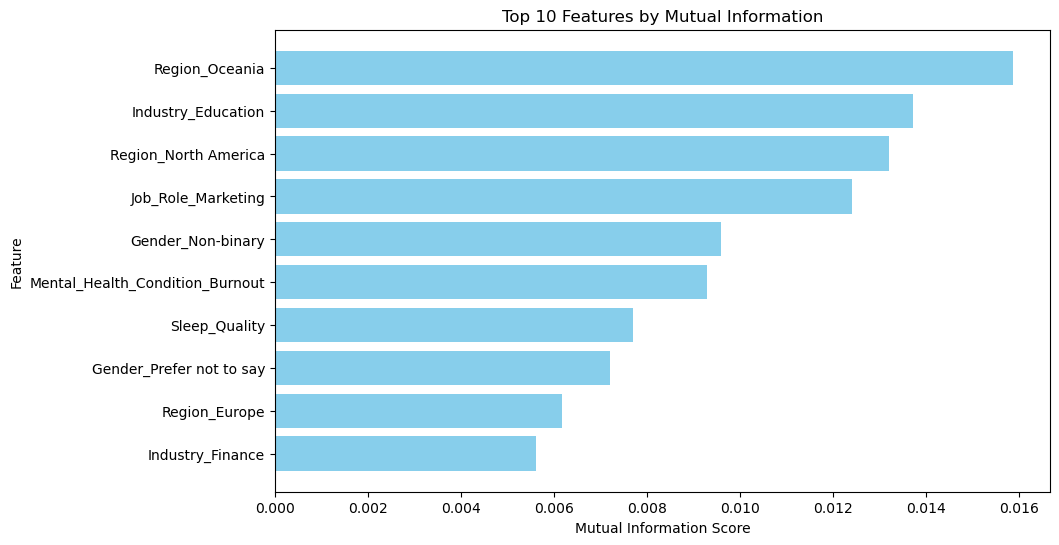

In [250]:
# getting feature scores and selected feature names
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

# Create a df for visualization
top_features_df = pd.DataFrame({
    "Feature": selected_features,
    "Score": feature_scores[selector.get_support()]
}).sort_values(by="Score", ascending=False)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.barh(top_features_df["Feature"], top_features_df["Score"], color='skyblue')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Top 10 Features by Mutual Information")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest score on top
plt.show()

In [236]:
# Use the selected features to split the data into train and test sets
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [238]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [240]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [242]:
y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1,  1,  0,  1,  1,  1,  1, -1,  0,  0,  1,  1,  0, -1,  0,
        0, -1,  0,  1, -1,  0, -1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  1,
       -1,  0,  0,  1,  1,  1, -1,  1, -1,  1,  0, -1,  1, -1,  1,  1,  0,
        0,  1, -1,  0,  0, -1, -1,  1, -1,  1,  1,  0, -1,  0,  0,  1, -1,
       -1,  1,  0, -1, -1,  0,  1,  1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  1,  0, -1, -1,  0, -1, -1,  1,  1,  1,  1,  0,  0, -1,  0,
        0, -1,  0, -1,  1,  0,  1,  1, -1,  0,  0,  0, -1,  1,  1,  0,  1,
        0,  1,  1,  0, -1,  0,  1, -1,  1, -1, -1,  0,  1, -1,  1,  1, -1,
        0,  0, -1, -1,  0, -1, -1, -1,  0,  1,  1,  0, -1, -1,  0,  0,  0,
        1,  0, -1, -1,  0,  0,  1,  1,  0, -1,  0,  1,  1, -1,  1,  1,  0,
       -1,  0,  1,  1, -1,  0,  0,  1,  0,  0,  0, -1, -1,  1,  1, -1,  0,
       -1,  0,  0, -1,  0, -1, -1,  0,  1,  0, -1, -1,  0,  1, -1,  1,  0,
        0,  1, -1,  0,  1,  0,  0, -1, -1,  0,  1,  1,  1,  1, -1,  0, -1,
       -1, -1,  1,  1, -1

Text(70.72222222222221, 0.5, 'True Labels')

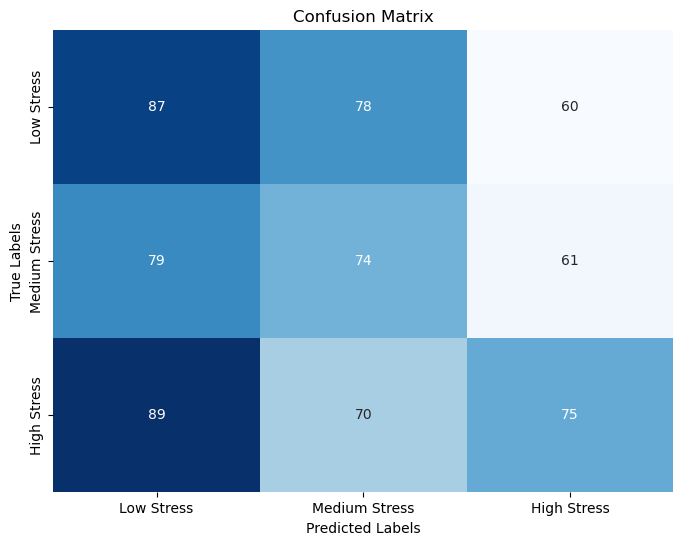

In [248]:
# Assuming y_test are the actual labels and y_pred are the predicted labels from the model

# 1. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Stress', 'Medium Stress', 'High Stress'], 
            yticklabels=['Low Stress', 'Medium Stress', 'High Stress'], cbar=False)

# 3. Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [246]:
# 7. Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.35066864784546803
              precision    recall  f1-score   support

          -1       0.34      0.39      0.36       225
           0       0.33      0.35      0.34       214
           1       0.38      0.32      0.35       234

    accuracy                           0.35       673
   macro avg       0.35      0.35      0.35       673
weighted avg       0.35      0.35      0.35       673

